In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: import numpy and pandas print 1

import numpy as np
import pandas as pd # cool !

df = pd.read_csv('/content/drive/MyDrive/SMAI/Q1Data.csv')
df.describe

<bound method NDFrame.describe of       MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0     0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1     0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2     0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3     0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4     0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   
...        ...       ...       ...       ...       ...       ...       ...   
7190 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889 -0.100753   
7191 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628 -0.116460   
7192 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905 -0.103317   
7193 -0.519497 -0.307553 -0.004921  0.072865  0.377131  0.086866 -0.115799   
7194 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596 -0.117672   

      MFCCs_ 8   MFCCs_9  MFC

In [ ]:
df.columns, df.dtypes

(Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
        'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
        'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
        'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'Family', 'Genus', 'Species'],
       dtype='object'),
 MFCCs_ 1    float64
 MFCCs_ 2    float64
 MFCCs_ 3    float64
 MFCCs_ 4    float64
 MFCCs_ 5    float64
 MFCCs_ 6    float64
 MFCCs_ 7    float64
 MFCCs_ 8    float64
 MFCCs_9     float64
 MFCCs_10    float64
 MFCCs_11    float64
 MFCCs_12    float64
 MFCCs_13    float64
 MFCCs_14    float64
 MFCCs_15    float64
 MFCCs_16    float64
 MFCCs_17    float64
 MFCCs_18    float64
 MFCCs_19    float64
 MFCCs_20    float64
 MFCCs_21    float64
 Family       object
 Genus        object
 Species      object
 dtype: object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoded_df = df.copy()
encoder = OneHotEncoder(sparse=False, drop='first')  # avoid multicollinearity
encoded_cols = encoder.fit_transform(df[['Family', 'Species']])
encoded_df = pd.concat([encoded_df, pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Family', 'Species']))], axis=1)
encoded_df.drop(['Family', 'Species'], axis=1, inplace=True)
encoded_df.iloc[:4]
encoded_df.columns

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'Genus', 'Family_Dendrobatidae',
       'Family_Hylidae', 'Family_Leptodactylidae',
       'Species_AdenomeraHylaedactylus', 'Species_Ameeregatrivittata',
       'Species_HylaMinuta', 'Species_HypsiboasCinerascens',
       'Species_HypsiboasCordobae', 'Species_LeptodactylusFuscus',
       'Species_OsteocephalusOophagus', 'Species_Rhinellagranulosa',
       'Species_ScinaxRuber'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = encoded_df.drop('Genus', axis=1)
y = encoded_df['Genus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5756, 33), (1439, 33), (5756,), (1439,))

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

dt_accuracies, dt_time_taken = [], []
for depth in range(1, 16):
  start = time.time()
  model = DecisionTreeClassifier(max_depth=depth, criterion="gini", random_state=42)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)
  accuracy = accuracy_score(y_test, prediction)
  tt = time.time() - start
  print(f"time taken: {tt}, for depth: {depth}, acc: {accuracy}")
  dt_time_taken.append(tt)
  dt_accuracies.append(accuracy)



time taken: 0.052802324295043945, for depth: 1, acc: 0.8068102849200834
time taken: 0.07489895820617676, for depth: 2, acc: 0.9179986101459346
time taken: 0.07645583152770996, for depth: 3, acc: 0.9576094510076442
time taken: 0.08815622329711914, for depth: 4, acc: 0.9742876997915219
time taken: 0.08942127227783203, for depth: 5, acc: 0.9881862404447533
time taken: 0.06645917892456055, for depth: 6, acc: 1.0
time taken: 0.06783461570739746, for depth: 7, acc: 1.0
time taken: 0.0664982795715332, for depth: 8, acc: 1.0
time taken: 0.0642087459564209, for depth: 9, acc: 1.0
time taken: 0.06406259536743164, for depth: 10, acc: 1.0
time taken: 0.06774449348449707, for depth: 11, acc: 1.0
time taken: 0.06662583351135254, for depth: 12, acc: 1.0
time taken: 0.06552553176879883, for depth: 13, acc: 1.0
time taken: 0.06690430641174316, for depth: 14, acc: 1.0
time taken: 0.06844305992126465, for depth: 15, acc: 1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_accuracies, knn_time_taken = [], []
for k in range(1, 1001):
    start = time.time()
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_prediction = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_prediction)
    tt_knn = time.time() - start
    # print(f"time taken: {tt_knn}, for k: {k}, acc: {knn_accuracy}")
    knn_time_taken.append(tt_knn)
    knn_accuracies.append(knn_accuracy)


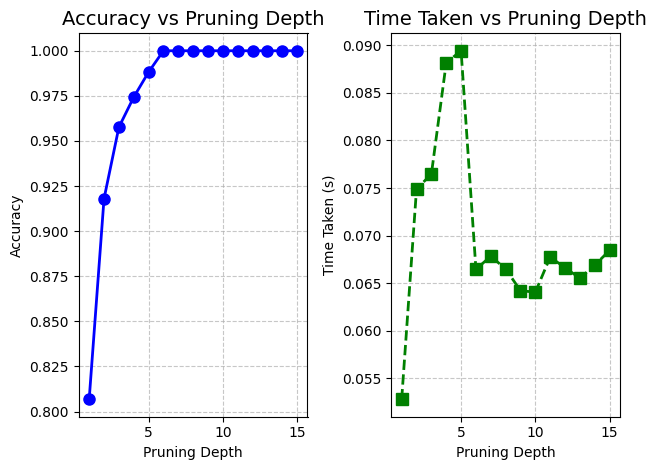

In [ ]:
#@title Plotting the graph for Decision tree

import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(range(1, 16), dt_accuracies, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel("Pruning Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Pruning Depth", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(range(1, 16), dt_time_taken, marker='s', color='green', linestyle='--', linewidth=2, markersize=8)
plt.xlabel("Pruning Depth")
plt.ylabel("Time Taken (s)")
plt.title("Time Taken vs Pruning Depth", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

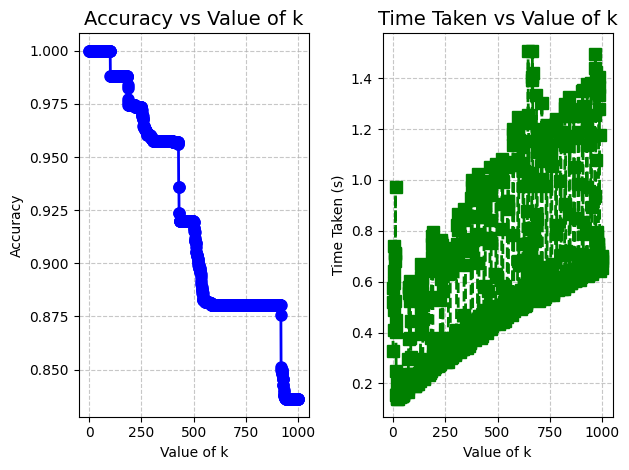

In [ ]:
#@title Plotting the graph for KNN (k = 1-1000)

import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(range(1, 1001), knn_accuracies, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Value of k", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(range(1, 1001), knn_time_taken, marker='s', color='green', linestyle='--', linewidth=2, markersize=8)
plt.xlabel("Value of k")
plt.ylabel("Time Taken (s)")
plt.title("Time Taken vs Value of k", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [ ]:
knn_accuracies[-5:-1]

[0.8359972202918694,
 0.8359972202918694,
 0.8359972202918694,
 0.8359972202918694]

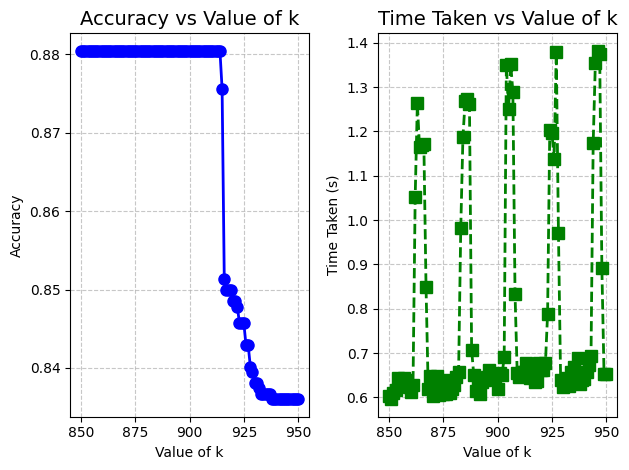

In [ ]:
#@title Plotting the graph for KNN (k = 1-1000)

import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(range(850, 951), knn_accuracies[850:951], marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Value of k", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(range(850, 951), knn_time_taken[850:951], marker='s', color='green', linestyle='--', linewidth=2, markersize=8)
plt.xlabel("Value of k")
plt.ylabel("Time Taken (s)")
plt.title("Time Taken vs Value of k", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

# Accuracy graph for self-made Decision Tree (entropy)
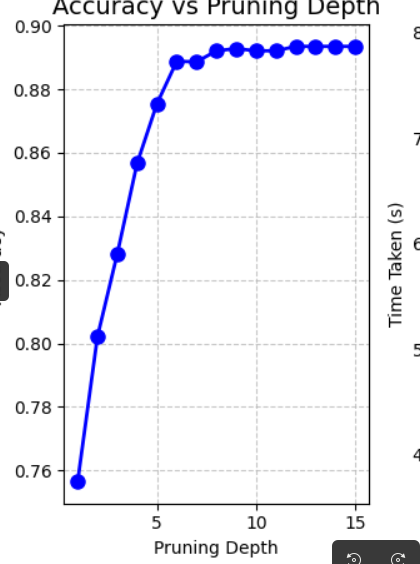

# Accuracy vs value of k (self-made KNN)
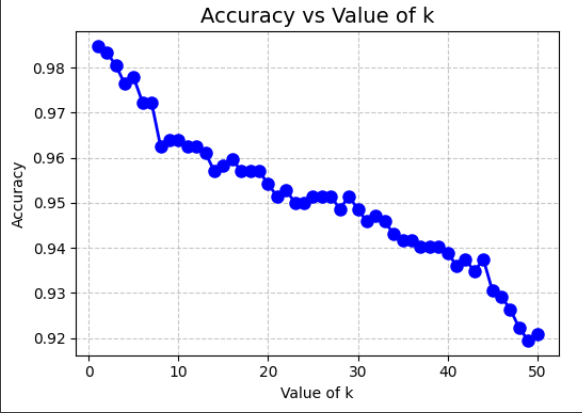

#Observations and Inferences
- The accuracy on the decision tree immediately reached `1` on the test dataset, strongly implying there seems to be some overfitting in the case of sci-kit learn model.
- The time taken also is very less for the decision tree of sci-kit learn
- The value of accuracy in the KNN model drops sharply after 900 between the range `900-950` in case of sci-kit learn library
- The value of accuracy of the self made knn model was at `92` at `k=50` while it was over `98` in the sci-kit learn model.
- However the value of accuracy drops sharply as we increase the value of `k` in the sci-kit learn model.
- The time taken is less for the sci-kit learn models in every scenario
